# Current weather on NE coast
https://darksky.net/dev/docs

In [5]:
import urllib.request
import json

In [6]:
cities = {'Washington':'38.9,77.0',
            'Atlantic City':'39.4,74.4',
            'Philadelphia':'40.0,75.1',
            'New York':'40.7,73.9',
            'Nantucket':'41.3,70.1',
            'New Haven':'41.3,72.9',
            'New Bedford':'41.7,70.9',
            'Cape Cod':'41.8,70.5',
            'Boston': '42.4,71.1',
         }

In [7]:
api_str = 'https://api.darksky.net/forecast/817a1054cf8cf001633f17ede8d4ea77/'

In [8]:
weather = {}
for city in cities:
    weather[city] = json.loads(urllib.request.urlopen(api_str+cities[city]).read())
    

In [9]:
for city in weather:
    print("{:<15s}: {:7.4f} ({}), {} m/s, {}°F ({}°F)".format(city, 
                               weather[city]['currently']['precipIntensity'],
                               weather[city]['currently']['precipType'],
                               weather[city]['currently']['windSpeed'],
                               weather[city]['currently']['temperature'],
                               weather[city]['currently']['apparentTemperature'],
                              
                              ))

Washington     :  0.0001 (rain), 5.31 m/s, 45.91°F (43.21°F)
Atlantic City  :  0.0018 (snow), 3.78 m/s, 12.75°F (6.19°F)
Philadelphia   :  0.0006 (snow), 6.16 m/s, 20.67°F (12.59°F)
New York       :  0.0001 (snow), 4.45 m/s, 24.93°F (19.37°F)
Nantucket      :  0.0001 (snow), 5.95 m/s, 35.02°F (29.86°F)
New Haven      :  0.0008 (rain), 5.42 m/s, 35.66°F (31.02°F)
New Bedford    :  0.0004 (snow), 3.51 m/s, 33.5°F (30.37°F)
Cape Cod       :  0.0001 (snow), 5.01 m/s, 19.99°F (12.96°F)
Boston         :  0.0001 (snow), 4.27 m/s, 31.68°F (27.42°F)


In [10]:
import pandas as pd
df_weather = pd.DataFrame({"city":[city for city in cities], 
                           "lat":[ float(loc.split(',')[0]) for loc in cities.values() ],
                           "long":[ float(loc.split(',')[1]) for loc in cities.values() ],
                           "intensity":[weather[city]['currently']['precipIntensity'] for city in cities],
                           "type":[weather[city]['currently']['precipType'] for city in cities],
                           "wind":[weather[city]['currently']['windSpeed'] for city in cities],
                           "temp":[weather[city]['currently']['temperature'] for city in cities],
                           "feelslike":[weather[city]['currently']['apparentTemperature'] for city in cities],
                          })

In [11]:
df_weather

,city,feelslike,intensity,lat,long,temp,type,wind
0,Washington,43.21,0.0001,38.9,77.0,45.91,rain,5.31
1,Atlantic City,6.19,0.0018,39.4,74.4,12.75,snow,3.78
2,Philadelphia,12.59,0.0006,40.0,75.1,20.67,snow,6.16
3,New York,19.37,0.0001,40.7,73.9,24.93,snow,4.45
4,Nantucket,29.86,0.0001,41.3,70.1,35.02,snow,5.95
5,New Haven,31.02,0.0008,41.3,72.9,35.66,rain,5.42
6,New Bedford,30.37,0.0004,41.7,70.9,33.50,snow,3.51
7,Cape Cod,12.96,0.0001,41.8,70.5,19.99,snow,5.01
8,Boston,27.42,0.0001,42.4,71.1,31.68,snow,4.27


In [12]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
cmap = sns.cubehelix_palette(start=2.8, rot=0.1, as_cmap=True)

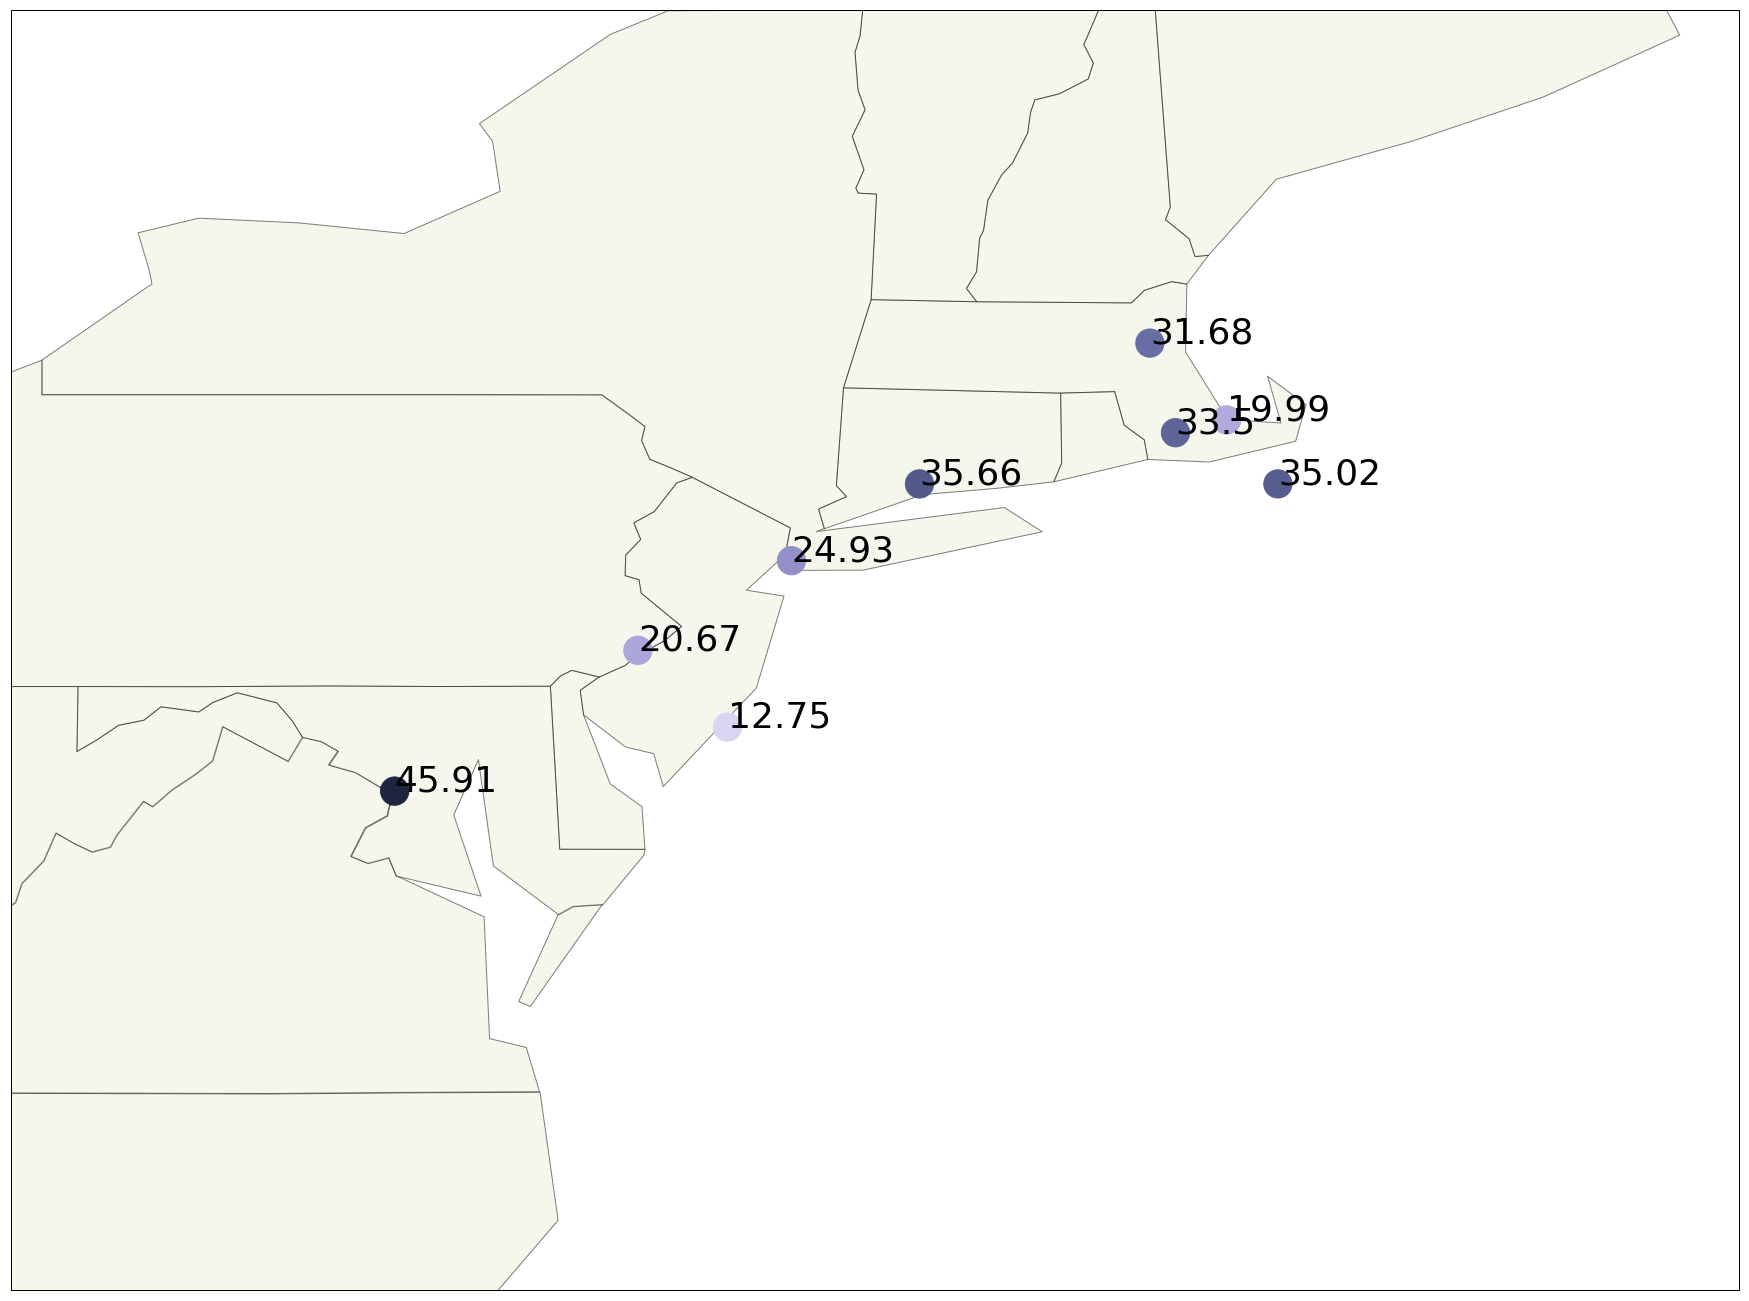

In [14]:
fig = plt.figure(figsize=(24, 36))
ax = plt.axes([0, 0, 1, 1],
              projection=ccrs.PlateCarree())

ax.set_extent([-80, -66.5, 35, 45], ccrs.PlateCarree())
#ax.background_patch.set_visible(True)
#ax.outline_patch.set_visible(True)


shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

for state in shpreader.Reader(states_shp).geometries():
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor, alpha=0.5
                      )

# plot temperatures
plt.scatter((df_weather.long * -1).values, 
            df_weather.lat.values,
            c=df_weather.temp,
            cmap=cmap,
            s=800, 
            zorder=2,
            transform=ccrs.PlateCarree())
coords = zip((df_weather.long * -1).values, df_weather.lat.values)
for xy,s in zip(coords, df_weather.temp):
    plt.annotate(xy=xy, 
                 s=s,
                 fontsize=36,
                )
plt.savefig("Temperature in North-East states.png")
plt.show()